In [2]:
import numpy as np
import torch
# from arsf_envi_reader import envi_header
import shutil
import os
import json
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr
from scipy.optimize import curve_fit
# from tqdm import tqdm
# import multiprocess as mp
from scipy import ndimage
from numpy import trapz
from osgeo import gdal

In [3]:
# high_res_img = gdal.Open(r'E:\wenqu\copy\site1b_simulation_mosaic')
high_res_radiance = gdal.Open(r'E:\wenqu\trait_map\site2a_d15n_trait.tif').ReadAsArray() 

high_res_radiance.shape

(5218, 5519)

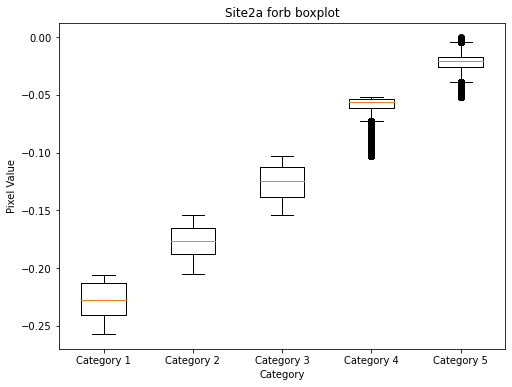

In [13]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# Open the image using GDAL
dataset = gdal.Open(r'E:\wenqu\PFT_map\site2a\site2a_forb_map.tif')

# Read the image data as a NumPy array
image_array = dataset.ReadAsArray()

# Flatten the pixel values
pixel_values = image_array.ravel()

# Calculate the histogram
hist, bins = np.histogram(pixel_values, bins=5)

# Create a list to hold the pixel values for each category
categories = []

# Split the pixel values into five categories based on the histogram bins
for i in range(len(bins) - 1):
    category = pixel_values[(pixel_values >= bins[i]) & (pixel_values < bins[i+1])]
    categories.append(category)

# Create a box plot for each category
plt.figure(figsize=(8, 6))
plt.boxplot(categories)
plt.xticks(np.arange(1, len(categories) + 1), ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
plt.title('Site2a forb boxplot')
plt.xlabel('Category')
plt.ylabel('Pixel Value')
plt.show()


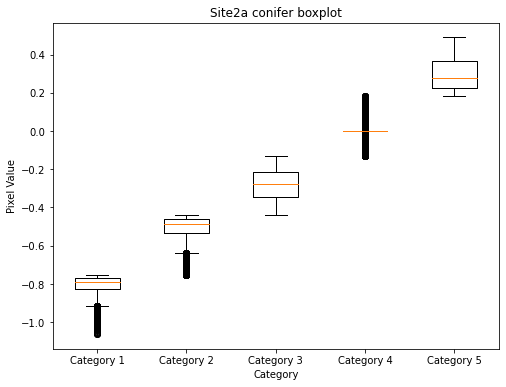

In [14]:
# Open the image using GDAL
dataset = gdal.Open(r'E:\wenqu\PFT_map\site2a\site2a_conifer_map.tif')

# Read the image data as a NumPy array
image_array = dataset.ReadAsArray()

# Flatten the pixel values
pixel_values = image_array.ravel()

# Calculate the histogram
hist, bins = np.histogram(pixel_values, bins=5)

# Create a list to hold the pixel values for each category
categories = []

# Split the pixel values into five categories based on the histogram bins
for i in range(len(bins) - 1):
    category = pixel_values[(pixel_values >= bins[i]) & (pixel_values < bins[i+1])]
    categories.append(category)

# Create a box plot for each category
plt.figure(figsize=(8, 6))
plt.boxplot(categories)
plt.xticks(np.arange(1, len(categories) + 1), ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
plt.title('Site2a conifer boxplot')
plt.xlabel('Category')
plt.ylabel('Pixel Value')
plt.show()

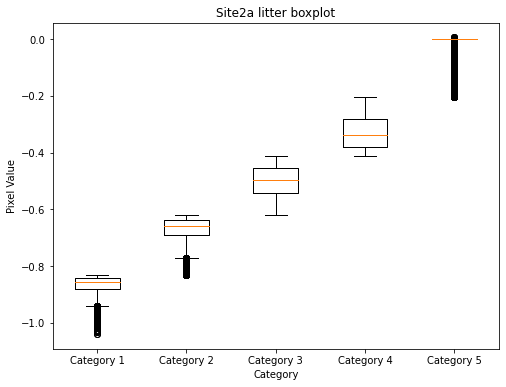

In [15]:
# Open the image using GDAL
dataset = gdal.Open(r'E:\wenqu\PFT_map\site2a\site2a_litter_map.tif')

# Read the image data as a NumPy array
image_array = dataset.ReadAsArray()

# Flatten the pixel values
pixel_values = image_array.ravel()

# Calculate the histogram
hist, bins = np.histogram(pixel_values, bins=5)

# Create a list to hold the pixel values for each category
categories = []

# Split the pixel values into five categories based on the histogram bins
for i in range(len(bins) - 1):
    category = pixel_values[(pixel_values >= bins[i]) & (pixel_values < bins[i+1])]
    categories.append(category)

# Create a box plot for each category
plt.figure(figsize=(8, 6))
plt.boxplot(categories)
plt.xticks(np.arange(1, len(categories) + 1), ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
plt.title('Site2a litter boxplot')
plt.xlabel('Category')
plt.ylabel('Pixel Value')
plt.show()

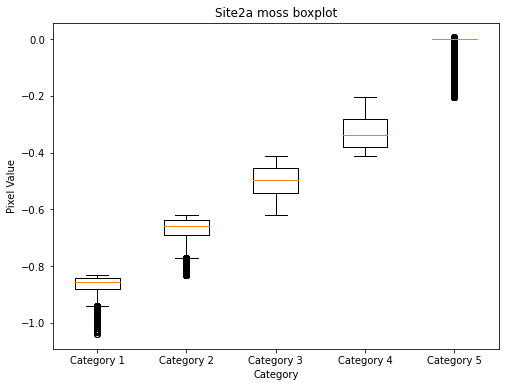

In [16]:
# Open the image using GDAL
dataset = gdal.Open(r'E:\wenqu\PFT_map\site2a\site2a_moss_map.tif')

# Read the image data as a NumPy array
image_array = dataset.ReadAsArray()

# Flatten the pixel values
pixel_values = image_array.ravel()

# Calculate the histogram
hist, bins = np.histogram(pixel_values, bins=5)

# Create a list to hold the pixel values for each category
categories = []

# Split the pixel values into five categories based on the histogram bins
for i in range(len(bins) - 1):
    category = pixel_values[(pixel_values >= bins[i]) & (pixel_values < bins[i+1])]
    categories.append(category)

# Create a box plot for each category
plt.figure(figsize=(8, 6))
plt.boxplot(categories)
plt.xticks(np.arange(1, len(categories) + 1), ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
plt.title('Site2a moss boxplot')
plt.xlabel('Category')
plt.ylabel('Pixel Value')
plt.show()

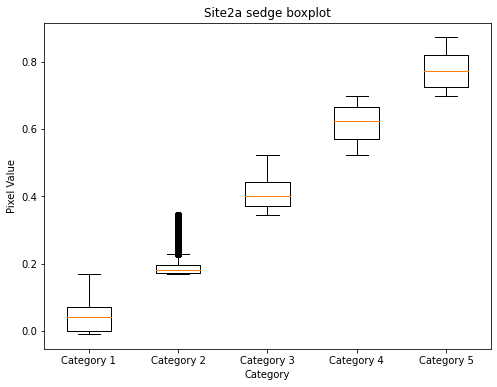

In [17]:
# Open the image using GDAL
dataset = gdal.Open(r'E:\wenqu\PFT_map\site2a\site2a_sedge_map.tif')

# Read the image data as a NumPy array
image_array = dataset.ReadAsArray()

# Flatten the pixel values
pixel_values = image_array.ravel()

# Calculate the histogram
hist, bins = np.histogram(pixel_values, bins=5)

# Create a list to hold the pixel values for each category
categories = []

# Split the pixel values into five categories based on the histogram bins
for i in range(len(bins) - 1):
    category = pixel_values[(pixel_values >= bins[i]) & (pixel_values < bins[i+1])]
    categories.append(category)

# Create a box plot for each category
plt.figure(figsize=(8, 6))
plt.boxplot(categories)
plt.xticks(np.arange(1, len(categories) + 1), ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
plt.title('Site2a sedge boxplot')
plt.xlabel('Category')
plt.ylabel('Pixel Value')
plt.show()

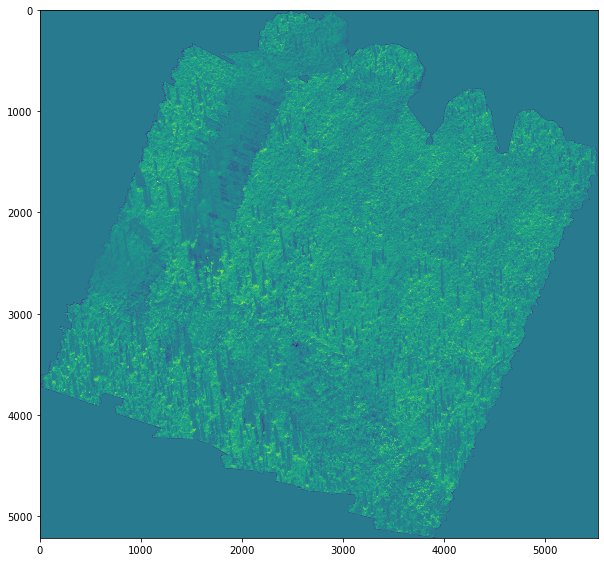

In [5]:
fig = plt.figure(figsize = (10,10))
plt.imshow(high_res_radiance[:,:], interpolation='nearest')
plt.show()

In [7]:
max_value = np.max(high_res_radiance)
min_value = np.min(high_res_radiance)

print("Maximum Value:", max_value)
print("Minimum Value:", min_value)

Maximum Value: 1.7459283
Minimum Value: -1.2477616


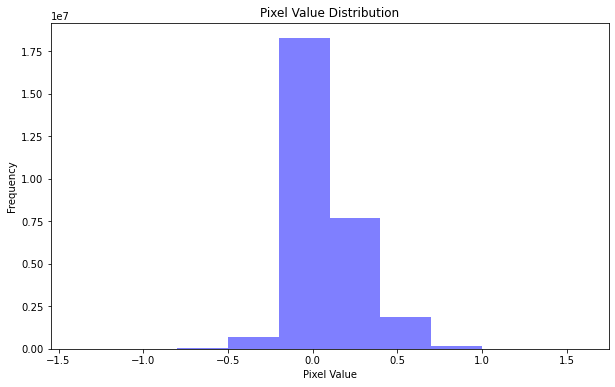

In [10]:
# Define the number of bins and range for the histogram
num_bins = 10  # You can adjust this value as needed
value_range = (min_value, max_value)  # The range of pixel values

# Calculate the histogram
hist, bins = np.histogram(high_res_radiance, bins=num_bins, range=value_range)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, color='blue', alpha=0.5, width=(value_range[1] - value_range[0]) / num_bins)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()